In [54]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
y_k = np.array([0, 0.36, 0.38, 1.23, 1.67, 2.27, 2.19, 3.19, 3.38, 5.05, 6.61])
u_k = np.array([0, 1, 1, 1, 1, 0.5, 0.5, 0, 0, -1, 0])

In [56]:
A = np.vstack([y_k[:-1], u_k[:-1]]).T
b = y_k[1:]

In [57]:
params = np.linalg.lstsq(A, b, rcond=None)[0]

In [58]:
params.shape

(2,)

In [62]:
def plot_dynamics(x_0, u_k, y_k, params):

    # x_k+1 = a*x_k + b*u_k
    # y_k = x_k + w_k
    # plot the states, given the dynamics and the inputs

    x = x_0
    for i, (u, y) in enumerate(zip(u_k, y_k)):
        y_hat = x
        # plt.plot(i, x, '-o')
        plt.plot(i, y_hat, 'o')
        plt.plot(i, y, 'x')
        x = np.dot(np.array([x, u]), params)

    plt.show()

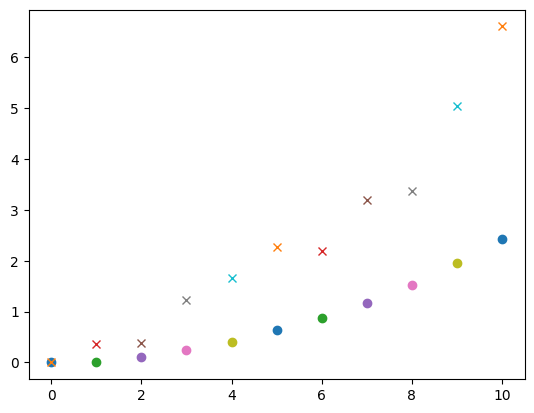

In [63]:
plot_dynamics(0.0, u_k, y_k, params)

In [64]:
y_k_squared = y_k ** 2
A_prime = np.stack([y_k[:-1], y_k_squared[:-1], u_k[:-1]]).T

params_prime = np.linalg.lstsq(A_prime, b, rcond=None)[0]

In [65]:
params_prime

array([0.93952071, 0.09352249, 0.42754227])

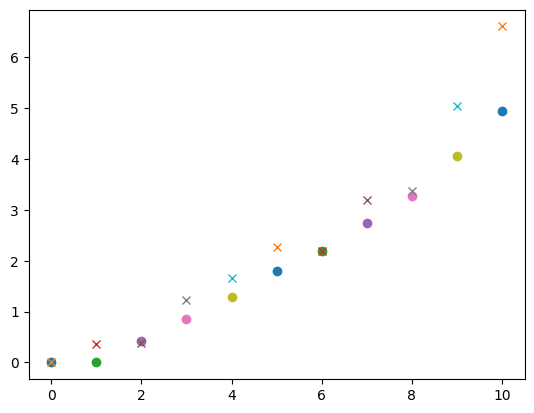

In [74]:
x = 0.0

for i, (u, y) in enumerate(zip(u_k, y_k)):
    y_hat = x
    # plt.plot(i, x, '-o')
    plt.plot(i, y_hat, 'o')
    plt.plot(i, y, 'x')
    x = np.dot(np.array([y_hat, y_hat**2, u]), params_prime)

plt.show()

In [75]:
A = np.array([[-1, -1, 3], [2, -2, -2], [-1, -1, -3]]) / 6.0

In [88]:
l, u = np.linalg.eig(A @ A.T)

In [89]:
m, v = np.linalg.eig(A.T @ A)

In [90]:
print(l, m)

[0.66666667 0.11111111 0.16666667] [0.66666667 0.11111111 0.16666667]


In [91]:
u @ np.diag(np.sqrt(l)) @ v.T

array([[ 0.16666667,  0.16666667, -0.5       ],
       [-0.33333333,  0.33333333,  0.33333333],
       [ 0.16666667,  0.16666667,  0.5       ]])

In [92]:
print(u, v)

[[-5.77350269e-01  7.07106781e-01 -4.08248290e-01]
 [ 5.77350269e-01 -1.45757506e-15 -8.16496581e-01]
 [ 5.77350269e-01  7.07106781e-01  4.08248290e-01]] [[-2.35702260e-01  7.07106781e-01  6.66666667e-01]
 [ 2.35702260e-01  7.07106781e-01 -6.66666667e-01]
 [ 9.42809042e-01 -1.04170206e-16  3.33333333e-01]]


In [93]:
v.T @ u

array([[ 8.16496581e-01,  5.00000000e-01,  2.88675135e-01],
       [ 3.28435362e-16,  5.00000000e-01, -8.66025404e-01],
       [-5.77350269e-01,  7.07106781e-01,  4.08248290e-01]])

In [99]:
s, p = np.linalg.eig(A)

In [103]:
s

array([-0.16666667+0.372678j, -0.16666667-0.372678j,
       -0.66666667+0.j      ])